   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.8 MB 19.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 12.2 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 9.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 8.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 7.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 7.2 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 6.9 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


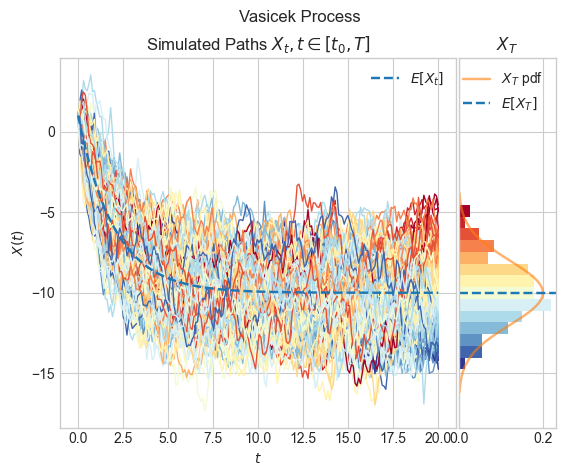

In [1]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

## Definition

The Vasicek model specifies that the instantaneous interest rate is defined by a stochastic process which can be defined by the following Stochastic Differential Equation (SDE)


\begin{equation}
dX_t = \theta (\mu - X_t) dt + \sigma dW_t, \quad t >0,
\end{equation}


with initial condition  $X_0 =x_0\in\mathbb{R}$, and where $W_t$ is a standard Brownian motion, and the three parameters are constants:

- $\theta>0$ : speed or mean reversion coefficient
- $\mu \in \mathbb{R}$ : long term mean
- $\sigma>0$ : volatility



In order to find the solution to this SDE, let us set the function $f(t,x) = x e^{\theta t}$. Then, Ito's formula implies


\begin{align*}
X_te^{\theta t} &= x_0 +\int_0^t X_s \theta e^{\theta s}ds + \int_0^t e^{\theta s}dX_s \\
& = x_0 + \int_0^t \left[ \theta X_s  e^{\theta s}  +\theta e^{\theta s}(\mu - X_s)\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \int_0^t \left[ \theta e^{\theta s}\mu\right] ds + \int_0^t e^{\theta s}\sigma dW_s\\
& = x_0 + \mu(e^{\theta t} - 1) + \int_0^t e^{\theta s}\sigma dW_s.
\end{align*}


Thus

\begin{equation}
X_t = x_0e^{-\theta t} +  \mu(1- e^{-\theta t})  + \sigma \int_0^t e^{-\theta (t-s)}dW_s.
\end{equation}

### Expectation and Variance

For each $t>0$, the conditional marginal $X_t|X_0$ from a Vacisek process satisfies

\begin{equation*}
\mathbf{E} [X_t ] = \mathbb{E}[X_t|X_0] = x_0e^{-\theta t} +  \mu(1- e^{-\theta t}),
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbb{Var} [X_t |X_0] =  \frac{\sigma^2}{ 2\theta} (1- e^{-2\theta t}).
\end{equation*}

To obtain the expectation we simply use the linearity of the expectation and the fact that the Ito integral in equation (2) is a martingale. Similarly, for the variance we  use basic properties of the variance and the isometry property of the Ito integral.

### Python Implementation

So, for given $x_0, \theta>0, \mu, \sigma>0$ and $t,s>0$ You will implement the above formulas for the expectation, variance, and covariance as follows.

In [16]:
import numpy as np

def expectation(x0, theta, mu, t):
    return x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def variance(theta, sigma, t):
    return (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

def covariance(theta, sigma, s, t):
    if s > t:
        s, t = t, s
    return (sigma**2 / (2 * theta)) * np.exp(-theta * (t - s)) * (1 - np.exp(-2 * theta * s))

### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`.

One way to do this is by using the object  `norm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

In [17]:
from scipy import stats
from scipy.stats import norm
#### Calculate Mean and Varaince of Normal Distribution with initial values of X0,mu,sigma,t


### Probability Density Functions

The probability density function (pdf) of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t; \theta,  \mu, \sigma, x_0) = \dfrac{1}{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})} \sqrt{2 \pi }}\exp\left\{ -\dfrac{1}{2} \left(\dfrac{x- [x_0e^{-\theta t} +  \mu(1- e^{-\theta t})] }{ \frac{\sigma}{ \sqrt{2\theta}}  \sqrt{ (1- e^{-2\theta t})}}\right)^2  \right\}, \qquad \forall x\in\mathbb{R}, t>0.
\end{equation*}

First we consider the process
`Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)` and plot the marginal density of $X_1$.
Note that the mean is still far from the long term mean $\mu=10$. Code it and plot the Graph of Distribution
'''
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
''''

Mean: 6.6890850294570185 Variance: 0.10808308959542341


C:\Users\Purabjeet\AppData\Local\Temp\ipykernel_22132\3422367798.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


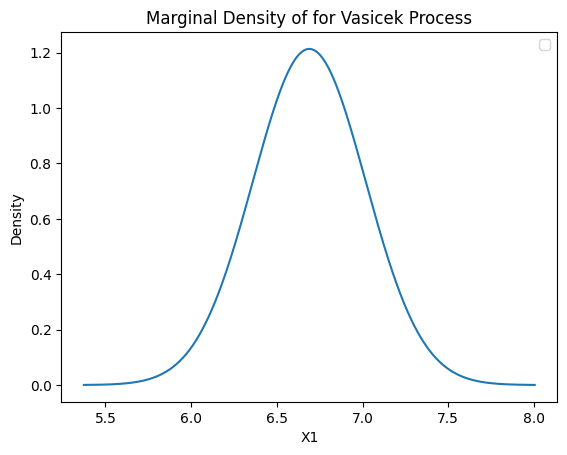

In [18]:
process = Vasicek(theta=1.0, mu=10.0, sigma=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)

mean = vasicek_expectation(x0=1.0, theta=1.0, mu=10.0, t=1.0)
variance = vasicek_variance(theta=1.0, sigma=0.5, t=1.0)
print('Mean:', mean, 'Variance:', variance)
std_dev = np.sqrt(variance)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y)
plt.title('Marginal Density of for Vasicek Process')
plt.xlabel('X1')
plt.ylabel('Density')
plt.legend()
plt.show()

**Plot Graphs** Dsitrbution in which Vary one at time ( sigma,mu,theta ,t ) . Vary one value taking  initial values of sigma,mu,theta,t

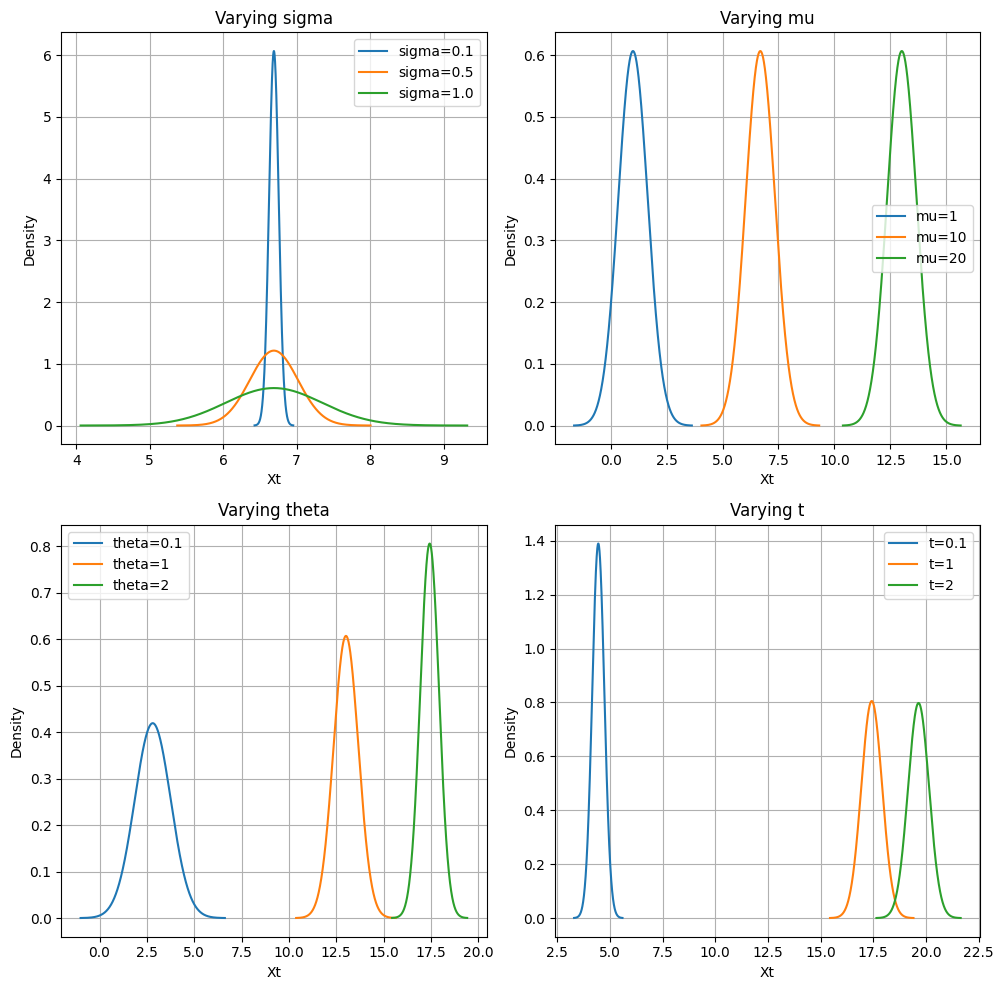

In [22]:
class VasicekProcess:
    def __init__(self, theta, mu, sigma, initial):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.initial = initial

    def get_expectation(self, t):
        return self.initial * np.exp(-self.theta * t) + self.mu * (1 - np.exp(-self.theta * t))

    def get_variance(self, t):
        return (self.sigma**2 / (2 * self.theta)) * (1 - np.exp(-2 * self.theta * t))

    def get_marginal(self, t):
        mean = self.get_expectation(t)
        variance = self.get_variance(t)
        return mean, variance

# Initial parameters
initial = 1.0
theta = 1.0
mu = 10.0
sigma = 0.5
t = 1.0

# Create a function to plot the marginal density
def plot_density(ax, mean, variance, label):
    std_dev = np.sqrt(variance)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)
    ax.plot(x, y, label=label)
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Vary sigma
sigmas = [0.1, 0.5, 1.0]
for sigma in sigmas:
    process = VasicekProcess(theta=theta, mu=mu, sigma=sigma, initial=initial)
    mean, variance = process.get_marginal(t)
    plot_density(axs[0, 0], mean, variance, f'sigma={sigma}')
axs[0, 0].set_title('Varying sigma')
axs[0, 0].set_xlabel('Xt')
axs[0, 0].set_ylabel('Density')

# Vary mu
mus = [1, 10, 20]
for mu in mus:
    process = VasicekProcess(theta=theta, mu=mu, sigma=sigma, initial=initial)
    mean, variance = process.get_marginal(t)
    plot_density(axs[0, 1], mean, variance, f'mu={mu}')
axs[0, 1].set_title('Varying mu')
axs[0, 1].set_xlabel('Xt')
axs[0, 1].set_ylabel('Density')

# Vary theta
thetas = [0.1, 1, 2]
for theta in thetas:
    process = VasicekProcess(theta=theta, mu=mu, sigma=sigma, initial=initial)
    mean, variance = process.get_marginal(t)
    plot_density(axs[1, 0], mean, variance, f'theta={theta}')
axs[1, 0].set_title('Varying theta')
axs[1, 0].set_xlabel('Xt')
axs[1, 0].set_ylabel('Density')

# Vary t
times = [0.1, 1, 2]
for t in times:
    process = VasicekProcess(theta=theta, mu=mu, sigma=sigma, initial=initial)
    mean, variance = process.get_marginal(t)
    plot_density(axs[1, 1], mean, variance, f't={t}')
axs[1, 1].set_title('Varying t')
axs[1, 1].set_xlabel('Xt')
axs[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Purabjeet\AppData\Local\Temp\ipykernel_22132\754776402.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
C:\Users\Purabjeet\AppData\Local\Temp\ipykernel_22132\754776402.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
C:\Users\Purabjeet\AppData\Local\Temp\ipykernel_22132\754776402.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')


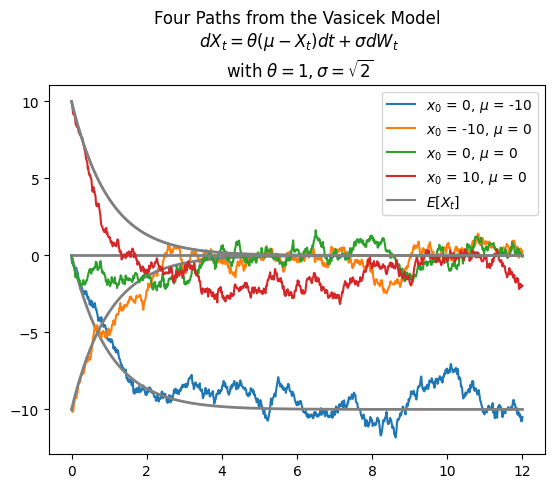

In [23]:
#from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

**Simulation**

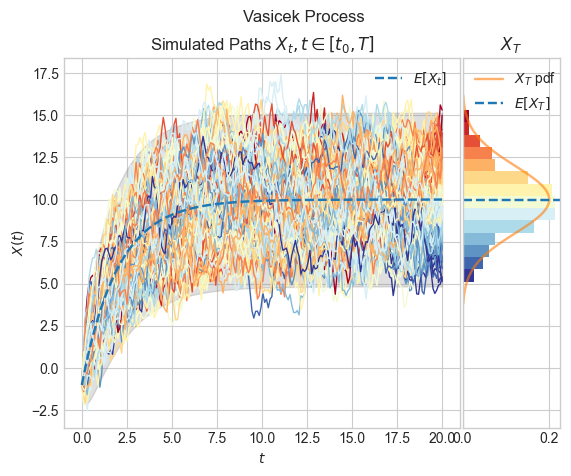

In [24]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

#### The parameter $\theta$ determines the Speed of Convergence

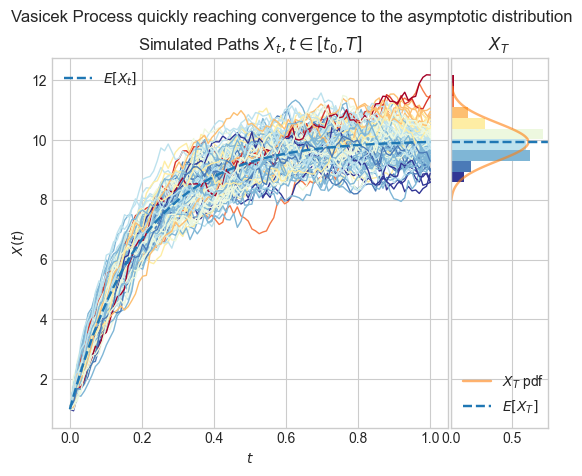

In [6]:
# from aleatory.processes import Vasicek
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

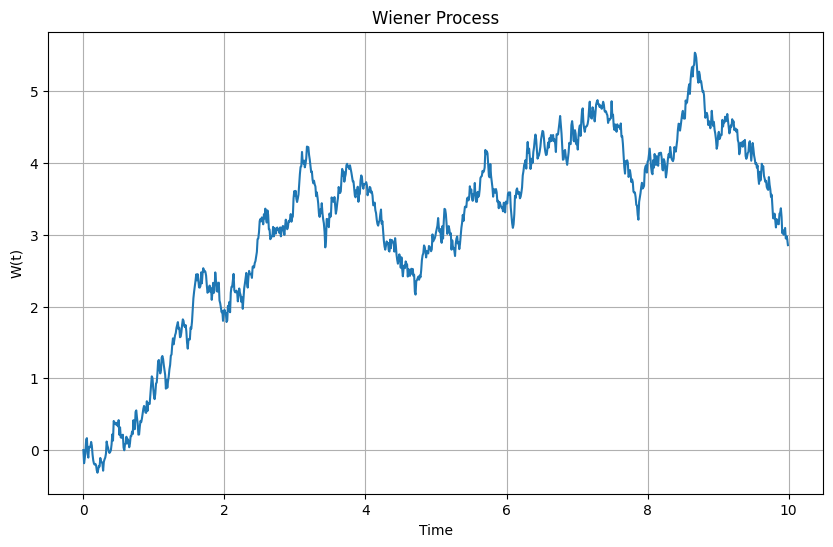

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

#Plot different no. of paths by varying parameter and time interval!

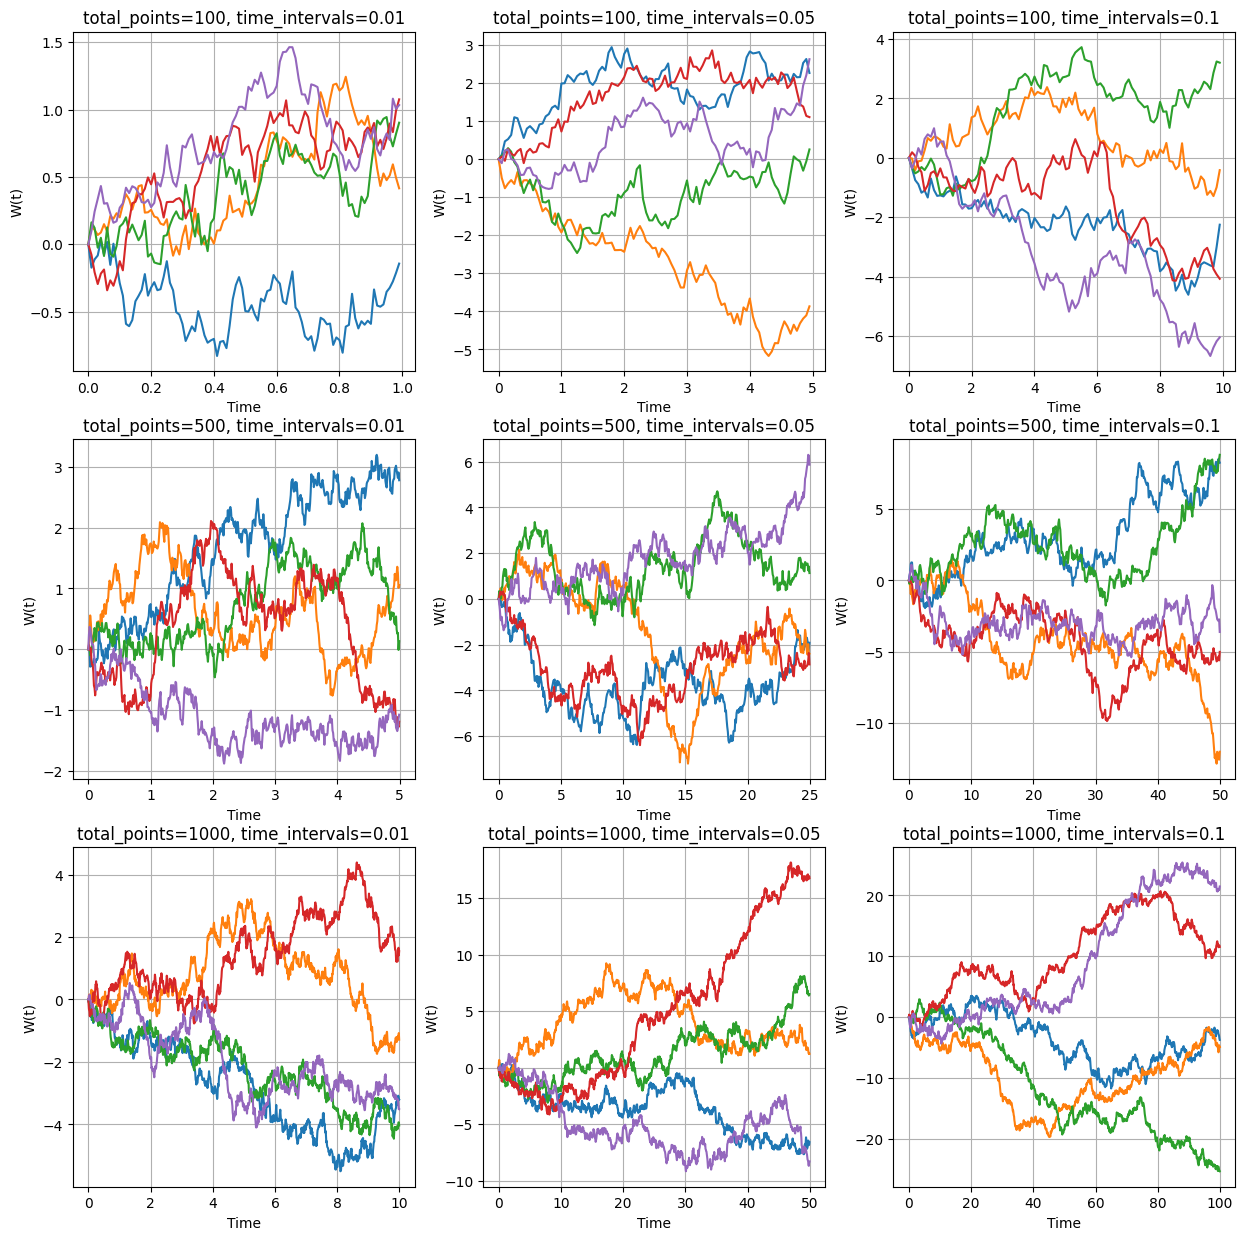

In [33]:
def calculate_random_walk(total_points, step_size):
    changes = np.random.normal(0, np.sqrt(step_size), total_points - 1)
    P = np.concatenate([[0], np.cumsum(changes)])
    return P

def display_random_paths(path_quantity, point_options, step_options):
    fig, axs = plt.subplots(len(point_options), len(step_options), figsize=(15,15))
    for i, total_points in enumerate(point_options):
        for j, step_size in enumerate(step_options):
            for _ in range(path_quantity):
                P = calculate_random_walk(total_points, step_size)
                axs[i, j].plot(np.arange(total_points) * step_size, P)
            axs[i, j].set_title(f'total_points={total_points}, time_intervals={step_size}')
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('W(t)')
            axs[i, j].grid(True)
    plt.show()
     
path_quantity = 5  # Number of paths to simulate
point_options = [100, 500, 1000]  # Different numbers of points
step_options = [0.01, 0.05, 0.1]  # Different time intervals

display_random_paths(path_quantity, point_options, step_options)